## Observations and Insights 

1. There is a postitive correlation between the weight of the mice and the tumor size, which is 0.84. When the mouse weight increases the average tumor volume increases as well.

2. Capomulin appears to be more effective drug regimen to treat the cancer compared to other drugs, as the tumor size for mouse l509 decreased over time.

3. According to the analysis, there was only one outlier found under Infubinol drug regimen. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from matplotlib.pyplot import figure
from sklearn import datasets
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer')

# Display the data table
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Check the number of mice.
mice = combined_data["Mouse ID"].value_counts()
mice_numbers = len(mice)
mice_numbers

249

In [3]:
# Find the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice_numbers = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duplicate_mouse_IDs = pd.DataFrame(duplicate_mice_numbers)
all_duplicate_mouse_IDs


,0
0,g989


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_data = combined_data[combined_data['Mouse ID'].isin(duplicate_mice_numbers)==False]

In [6]:
# Check the number of mice in the clean DataFrame.
clean_mice = clean_combined_data["Mouse ID"].value_counts()
clean_mice_numbers = len(clean_mice)
clean_mice_numbers

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume.

regimen_mean = clean_combined_data.groupby('Drug Regimen').mean()["Tumor Volume (mm3)"]
regimen_mean

regimen_median = clean_combined_data.groupby('Drug Regimen').median()["Tumor Volume (mm3)"]
regimen_median

regimen_variance = clean_combined_data.groupby('Drug Regimen').var()["Tumor Volume (mm3)"]
regimen_variance

regimen_standard_deviation = clean_combined_data.groupby('Drug Regimen').std()["Tumor Volume (mm3)"]
regimen_standard_deviation

regimen_SEM = clean_combined_data.groupby('Drug Regimen').sem()["Tumor Volume (mm3)"]
regimen_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [8]:
# Assemble the resulting series into a single summary dataframe.
summary_statistics_table = pd.DataFrame({"Mean": regimen_mean, "Median":regimen_median, "Variance":regimen_variance, "Standard Deviation": regimen_standard_deviation, "SEM": regimen_SEM})

summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_statistics_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Use the aggregation method, produce the same summary statistics in a single line
single_line_group_by = clean_combined_data.groupby ('Drug Regimen')
summary_statistics_table2 = single_line_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]
summary_statistics_table2

C:\Users\npeik\AppData\Local\Temp\ipykernel_13872\2202456755.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_statistics_table2 = single_line_group_by.agg(['mean','median','var','std','sem'])["Tumor Volume (mm3)"]


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

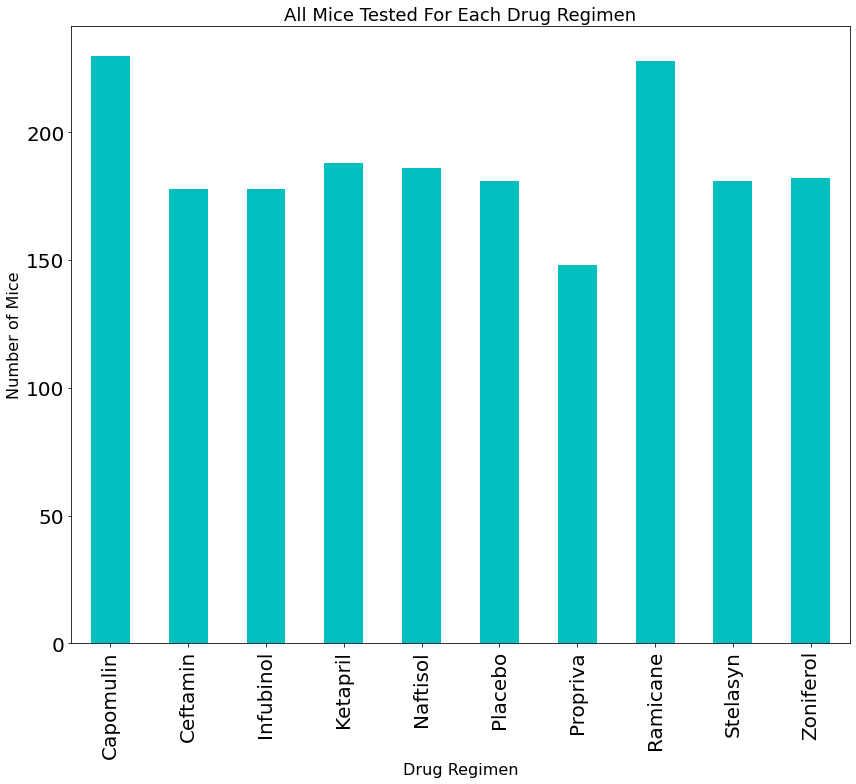

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

all_mice_tested_for_each_drug = clean_combined_data.groupby(["Drug Regimen"]).count()["Mouse ID"] 


plot_pandas = all_mice_tested_for_each_drug.plot.bar(figsize=(12,11), color='c',fontsize = 20)
all_mice_tested_for_each_drug

plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)
plt.title("All Mice Tested For Each Drug Regimen",fontsize = 18)

plt.tight_layout()
plt.show()

all_mice_tested_for_each_drug

In [12]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# Create an array that contains the number of mice each drug regimen has
mice_clean_list =(clean_combined_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
mice_clean_list


[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]

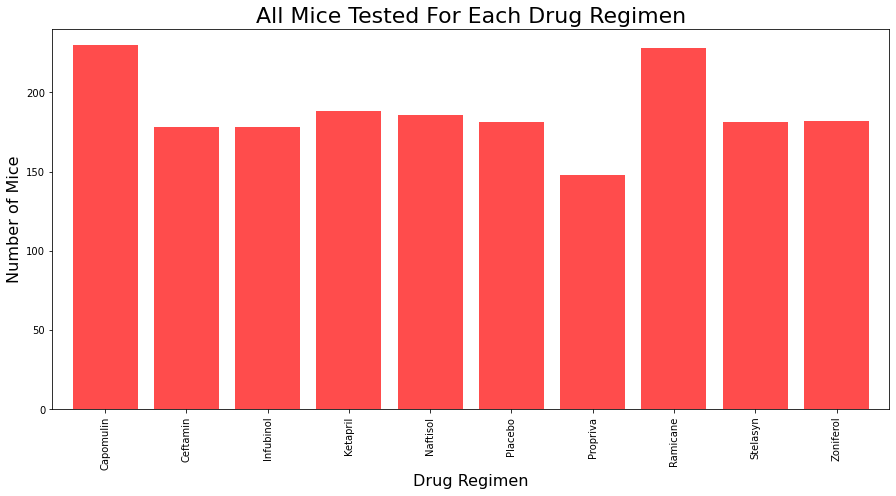

In [13]:
# Set x axis and tick locations
x_axis = np.arange(len(all_mice_tested_for_each_drug))

fig1, ax1 = plt.subplots(figsize=(15, 7))

plt.bar(x_axis, mice_clean_list, color='r', alpha=0.7, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.65, len(x_axis)-0.35)

plt.ylim(0, max(mice_clean_list)+10)

plt.title("All Mice Tested For Each Drug Regimen",fontsize = 22)
plt.xlabel("Drug Regimen",fontsize = 16)
plt.ylabel("Number of Mice",fontsize = 16)
plt.show()

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#  Group by gender and get the number to plot
mice_group_by_gender = clean_combined_data.groupby(["Mouse ID","Sex"])
mice_group_by_gender

mice_by_gender_df = pd.DataFrame(mice_group_by_gender.size())

# Create the dataframe which reflects the total count of Female and Male mice
mice_gender = pd.DataFrame(mice_by_gender_df.groupby(["Sex"]).count())
mice_gender.columns = ["Total Count"]

# Create the percentage of female vs male
mice_gender["Percentage of Sex"] = (100*(mice_gender["Total Count"]/mice_gender["Total Count"].sum()))

mice_gender


,Total Count,Percentage of Sex
Sex,,
Female,123,49.596774
Male,125,50.403226


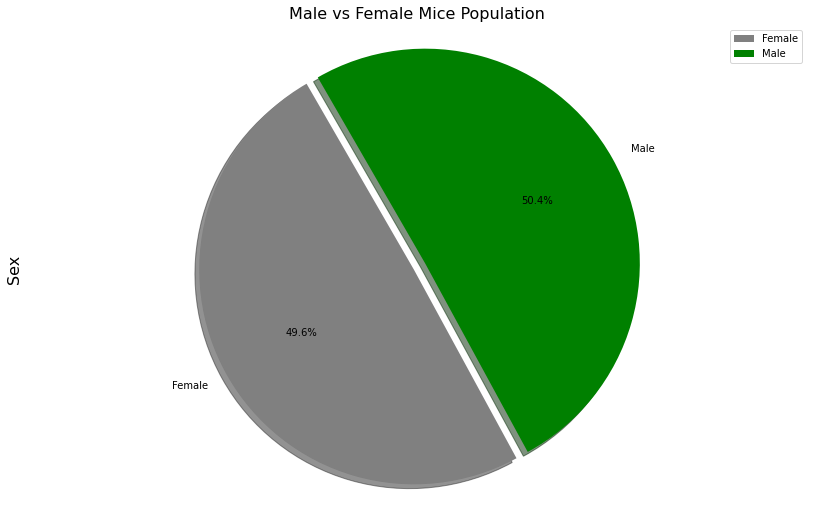

In [15]:
#  Create a pie plot showing the distribution of female versus male mice
colors = ['gray', 'green']
explode = (0.06, 0)
plot = mice_gender.plot.pie(y='Total Count',figsize=(14,9), colors = colors, startangle=120, explode = explode, shadow = True, autopct="%1.1f%%")

plt.legend(loc="best")
plt.title('Male vs Female Mice Population',fontsize = 16)
plt.ylabel('Sex',fontsize = 16)
plt.axis("equal")

plt.show()

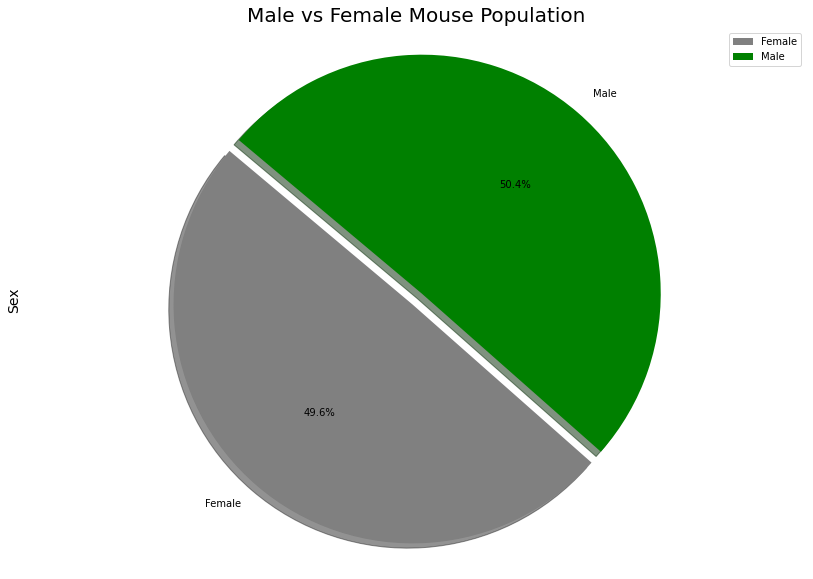

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Create Labels, size, colors and explode of the pir
labels = ["Female","Male"]
sizes = [49.596774,50.403226]
colors = ['gray', 'green']
explode = (0.06, 0)

# Create the pie chart
fig1, ax1 = plt.subplots(figsize=(14, 10))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140,)

plt.legend(loc="best")
plt.title('Male vs Female Mouse Population',fontsize = 20)
plt.ylabel('Sex',fontsize = 14)

#Set equal axis
plt.axis("equal")

plt.show()

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


Capomulin_df = clean_combined_data.loc[combined_data["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_combined_data.loc[combined_data["Drug Regimen"] == "Ramicane", :]
Infubinol_df = clean_combined_data.loc[combined_data["Drug Regimen"] == "Infubinol", :]
Ceftamin_df = clean_combined_data.loc[combined_data["Drug Regimen"] == "Ceftamin", :]

# Calculate for Capomulin
Capomulin_last = Capomulin_df.groupby('Mouse ID').max()['Timepoint']
Capomulin_volume = pd.DataFrame(Capomulin_last)
Capomulin_merge = pd.merge(Capomulin_volume, combined_data, on=("Mouse ID","Timepoint"),how="left")
Capomulin_merge.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [18]:
# Capomulin quartiles and IQR
# Determine outliers using upper and lower bounds
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles =Capomulin_tumors.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin tumors: {lowerq}")
print(f"The upper quartile of Capomulin tumors: {upperq}")
print(f"The interquartile range of Capomulin tumors: {iqr}")
print(f"The median of Capomulin tumors: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin tumors: 32.37735684
The upper quartile of Capomulin tumors: 40.1592203
The interquartile range of Capomulin tumors: 7.781863460000004
The median of Capomulin tumors: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse. Create a panda series by groupby of mouse id and the looking at the max timepoints of each mouse id
last_treatment = clean_combined_data.groupby(['Mouse ID'])['Timepoint'].max()
last_treatment_df = pd.DataFrame(last_treatment)

# Merge on Mouse ID and Timepoint, "how" on RIGHT so that it only records the MAX timepoints
last_df = pd.merge(clean_combined_data, last_treatment_df, on=('Mouse ID', 'Timepoint'), how='right')
last_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,Propriva,Female,12,26,10,48.710661,0
244,z578,Ramicane,Male,11,16,45,30.638696,0
245,z581,Infubinol,Female,24,25,45,62.754451,3
246,z795,Naftisol,Female,13,29,45,65.741070,3


In [20]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_capomulin = []
tumor_ramicane = []
tumor_infubinol = []
tumor_ceftamin = []

# Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in last_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_capomulin.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_ramicane.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_infubinol.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_ceftamin.append(row['Tumor Volume (mm3)'])
    
# add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_capomulin,
                       treatments[1]: tumor_ramicane,
                       treatments[2]: tumor_infubinol,
                       treatments[3]: tumor_ceftamin
                       })   
    
# Determine outliers using upper and lower bounds
drug_df_max = drug_df.max()
drug_df_min = drug_df.min()

drug_df.head()

,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078


In [21]:
# Calculate the IQR and quantitatively for each of the drugs to determine if there are any potential outliers:
quartiles_capomulin = drug_df[treatments[0]].quantile([.25, .5, .75])
lowerq_capomulin = quartiles_capomulin[.25]
median_capomulin = quartiles_capomulin[.5]
upperq_capomulin = quartiles_capomulin[.75]
iqr_capomulin = upperq_capomulin-lowerq_capomulin
lower_bound_capomulin = lowerq_capomulin - (1.5*iqr_capomulin)
upper_bound_capomulin = upperq_capomulin + (1.5*iqr_capomulin)
max_capomulin = drug_df[treatments[0]].max()
min_capomulin = drug_df[treatments[0]].min()

quartiles_ramicane = drug_df['Ramicane'].quantile([.25, .5, .75])
lowerq_ramicane = quartiles_ramicane[.25]
median_ramicane = quartiles_ramicane[.5]
upperq_ramicane = quartiles_ramicane[.75]
iqr_ramicane = upperq_ramicane-lowerq_ramicane
lower_bound_ramicane = lowerq_ramicane - (1.5*iqr_ramicane)
upper_bound_ramicane = upperq_ramicane + (1.5*iqr_ramicane)
max_ramicane = drug_df[treatments[1]].max()
min_ramicane = drug_df[treatments[1]].min()

quartiles_infubinol = drug_df[treatments[2]].quantile([.25, .5, .75])
lowerq_infubinol = quartiles_infubinol[.25]
median_infubinol = quartiles_infubinol[.5]
upperq_infubinol = quartiles_infubinol[.75]
iqr_infubinol = upperq_infubinol-lowerq_infubinol
lower_bound_infubinol = lowerq_infubinol - (1.5*iqr_infubinol)
upper_bound_infubinol = upperq_infubinol + (1.5*iqr_infubinol)
max_infubinol = drug_df[treatments[2]].max()
min_infubinol = drug_df[treatments[2]].min()

quartiles_ceftamin = drug_df[treatments[3]].quantile([.25, .5, .75])
lowerq_ceftamin = quartiles_ceftamin[.25]
median_ceftamin = quartiles_ceftamin[.5]
upperq_ceftamin = quartiles_ceftamin[.75]
iqr_ceftamin = upperq_ceftamin-lowerq_ceftamin
lower_bound_ceftamin = lowerq_ceftamin - (1.5*iqr_ceftamin)
upper_bound_ceftamin = upperq_ceftamin + (1.5*iqr_ceftamin)
max_ceftamin = drug_df[treatments[3]].max()
min_ceftamin = drug_df[treatments[3]].min()

outliers = pd.DataFrame({'Drug': treatments,
                         'Lower Quartile':[lowerq_capomulin, lowerq_ramicane, lowerq_infubinol, lowerq_ceftamin],
                         'Upper Quartile':[upperq_capomulin, upperq_ramicane, upperq_infubinol, upperq_ceftamin],
                         'IQR':[iqr_capomulin, iqr_ramicane, iqr_infubinol, iqr_ceftamin],
                         'Median':[median_capomulin, median_ramicane, median_infubinol, median_ceftamin],
                        'Upper Bound': [upperq_capomulin, upperq_ramicane, upperq_infubinol, upperq_ceftamin],
                        'Lower Bound': [lowerq_capomulin, lowerq_ramicane, lowerq_infubinol, lowerq_ceftamin],
                        'Max': [max_capomulin, max_ramicane, max_infubinol, max_ceftamin],
                         'Min': [min_capomulin, min_ramicane, min_infubinol, min_ceftamin]
                        })
outliers
outliers_group = outliers.groupby('Drug')
outliers_group.sum()

,Lower Quartile,Upper Quartile,IQR,Median,Upper Bound,Lower Bound,Max,Min
Drug,,,,,,,,
Capomulin,32.377357,40.159220,7.781863,38.125164,40.159220,32.377357,47.685963,23.343598
Ceftamin,48.722078,64.299830,15.577752,59.851956,64.299830,48.722078,68.923185,45.000000
Infubinol,54.048608,65.525743,11.477135,60.165180,65.525743,54.048608,72.226731,36.321346
Ramicane,31.560470,40.659006,9.098537,36.561652,40.659006,31.560470,45.220869,22.050126


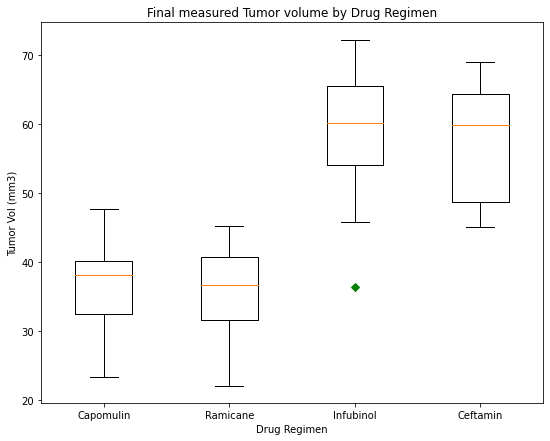

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Created a list to use for the boxplot. Each one list is a list of each drug tumor data. 
plot_list = [drug_df[treatments[0]],
                drug_df[treatments[1]],
                drug_df[treatments[2]],
                drug_df[treatments[3]]
               ]
# used plt.subplots to define size
fig1, ax = plt.subplots(figsize=(9,7))
ax.set_title('Final measured Tumor volume by Drug Regimen')
ax.set_xlabel('Drug Regimen') 
ax.set_ylabel('Tumor Vol (mm3)')

# used ax.plot function and ran the parameter boxplot_list to create the boxplot
ax.boxplot(plot_list, 0, 'gD')

# set labels of each boxplot
plt.xticks([1,2,3,4], treatments) 

plt.show()

## Line and Scatter Plots

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# create a dataframe
volumetime_df = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "b742",:]
volumetime_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
290,b742,Capomulin,Male,7,21,0,45.000000,0
291,b742,Capomulin,Male,7,21,5,41.534097,0
292,b742,Capomulin,Male,7,21,10,41.999228,0
293,b742,Capomulin,Male,7,21,15,39.524843,0
294,b742,Capomulin,Male,7,21,20,37.950355,0


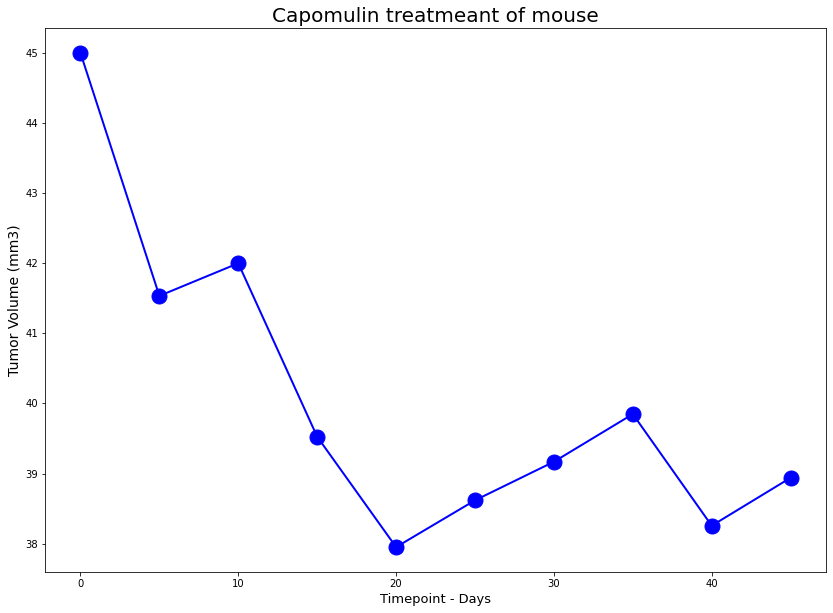

In [24]:
# Generate a line plot of tumor volume vs. time point
x_axis = volumetime_df["Timepoint"]
tumor_size = volumetime_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots(figsize=(14, 10))
plt.title('Capomulin treatmeant of mouse',fontsize =20)
plt.plot(x_axis, tumor_size,linewidth=2, markersize=15,marker="o",color="blue", label="Fahreneit")

plt.xlabel('Timepoint - Days',fontsize =13)
plt.ylabel('Tumor Volume (mm3)',fontsize =14)

plt.show()

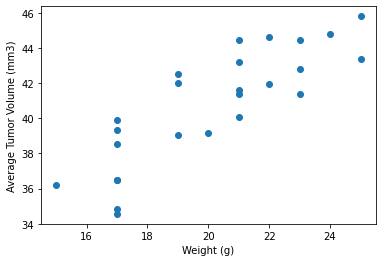

In [25]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

 # Created dataframe using .loc() of the drug regimine Capomulin using a boolean
    
newdata_df = clean_combined_data.loc[clean_combined_data["Drug Regimen"] == "Capomulin",:]

# use groupby() and mean() to create a dataframe
mouseID_mean = newdata_df.groupby(['Mouse ID']).mean()

# Create scatter plot of the x axis (weight) and the y axis (tumor size)
plt.scatter(mouseID_mean['Weight (g)'],mouseID_mean['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

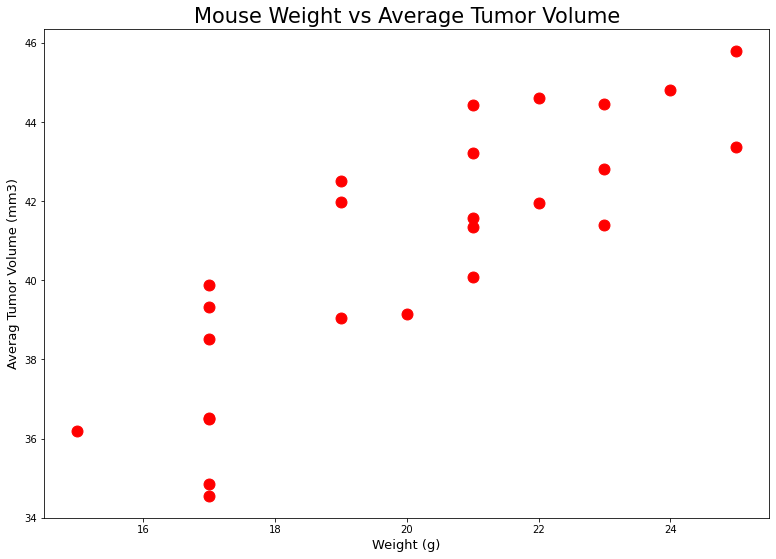

In [26]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
fig1, ax1 = plt.subplots(figsize=(13, 9))
average_capmulin_volume =Capomulin_df.groupby(['Mouse ID']).mean()

marker_size=15
plt.scatter(average_capmulin_volume['Weight (g)'],average_capmulin_volume['Tumor Volume (mm3)'],s=120, color="red")
plt.title('Mouse Weight vs Average Tumor Volume',fontsize =21)
plt.xlabel('Weight (g)',fontsize =13)
plt.ylabel('Averag Tumor Volume (mm3)',fontsize =13)

plt.show()


In [27]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corr=round(st.pearsonr(average_capmulin_volume['Weight (g)'],average_capmulin_volume['Tumor Volume (mm3)'])[0],2)

# Print The correlation 
print(f"The correlation between mouse weight and average tumor volume is {corr}")

The correlation between mouse weight and average tumor volume is 0.84


In [28]:
# Plot the different factors in a scatter plot
x_values = average_capmulin_volume['Weight (g)']
y_values = average_capmulin_volume['Tumor Volume (mm3)']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9544396890241049
intercept:21.552160532685008
rvalue (Correlation coefficient):0.8419363424694721
pandas (Correlation coefficient):0.84
stderr:0.12754359033201323
y = 0.95x + 21.55


The r-squared is: 0.7088568047708723


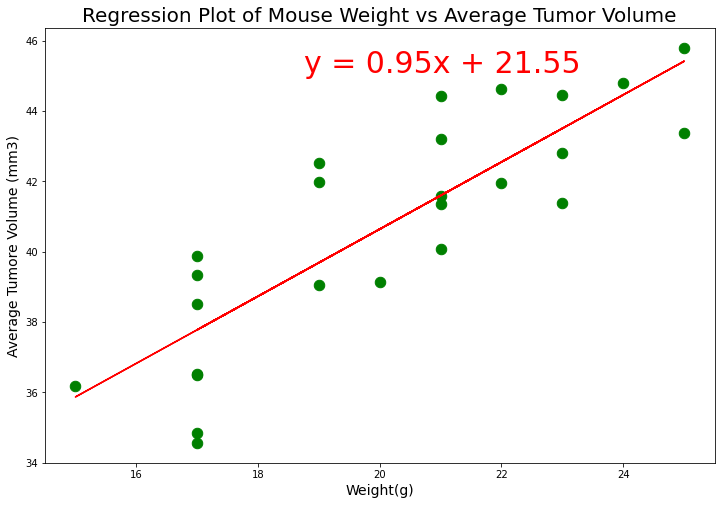

In [29]:
# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(12, 8))
plt.scatter(x_values,y_values,s=110, color="green")
plt.plot(x_values,regress_values,"r-")

plt.title('Regression Plot of Mouse Weight vs Average Tumor Volume',fontsize =20)
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 35), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

print(f"The r-squared is: {rvalue**2}")

plt.show()